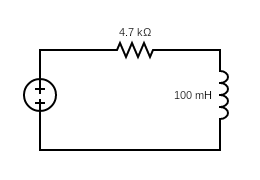

In [198]:
from sympy import *
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

### Usando sympy

In [199]:
S = 5
R = 4700
L = 100e-6

In [200]:
t = Symbol('t')
v = Function('v')(t)
i = Function('i')(t)

In [201]:
eq = Eq(S,R*i+L*i.diff(t))
eq

Eq(5, 4700*i(t) + 0.0001*Derivative(i(t), t))

In [202]:
dsolve(eq)

Eq(i(t), C1*exp(-47000000.0*t) + 1/940)

### Versão numérica usando scipy e numpy

**solve_ivp** necessita que a equação esteja na forma ${dy \over dt}= ...$, então a equação do circuito foi manipulada para isolarmos ${di \over dt}= ...$.

**tempo_maximo** não deve ser muito grande sob pena do algoritmo de solução não converter. O valor escolhido é adequado para se visualizar a solução 

In [203]:
def circuito(t,i):
    return (5 -4700*i)/0.0001

In [204]:
tempo_maximo = 0.000001
t = np.linspace(0,tempo_maximo,1000)
sol = solve_ivp(circuito,[0,tempo_maximo],[0],method='RK45',t_eval=t)

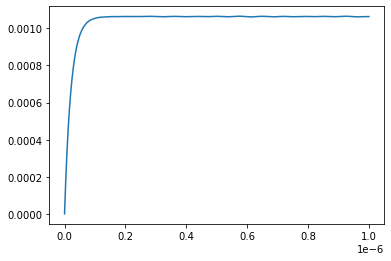

In [205]:
plt.plot(sol.t,sol.y[0])

## Mudando a fonte de tensão

Vamos usar agora uma tensão senoidal de 5V frequência de 1Khz

In [206]:
t = Symbol('t')
v = Function('v')(t)
i = Function('i')(t)

In [207]:
S = 5*sin(t*(2*pi/(1/1000)))
R = 4700
L = 100e-6

In [208]:
eq = Eq(S,R*i+L*i.diff(t))
eq

Eq(5*sin(2000*pi*t), 4700*i(t) + 0.0001*Derivative(i(t), t))

In [209]:
dsolve(eq)

Eq(i(t), C1*exp(-47000000.0*t) + 0.00106382976822168*sin(2000*pi*t) - 1.42217863170866e-7*cos(2000*pi*t))

### Versão numérica

In [210]:
def circuito(t,i):
    return (5*np.sin(t*(2*np.pi/0.0001)) -4700*i)/0.0001

In [211]:
tempo_maximo = 0.001
t = np.linspace(0,tempo_maximo,10000)
sol = solve_ivp(circuito,[0,tempo_maximo],[0],method='RK45',t_eval=t)

In [212]:
print(max(sol.y[0]),min(sol.y[0]))

0.0010661978534370956 -0.0010652848773317844


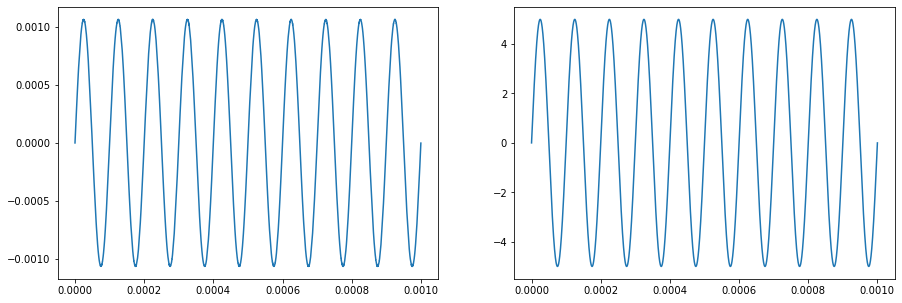

In [213]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(sol.t,sol.y[0])
plt.subplot(1, 2, 2)
plt.plot(t,5*np.sin(t*(2*np.pi/0.0001)))

### Teste do mesmo circuito no Falstad

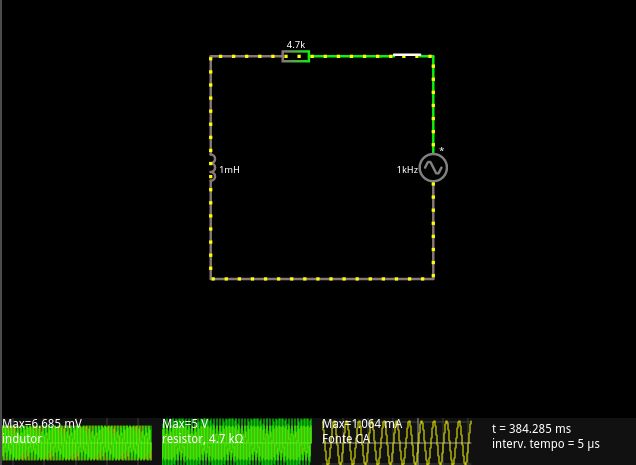